In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

In [3]:
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [4]:
df=df[0]

In [15]:
df.head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund,month
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538,October
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537,October
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536,April
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535,February
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534,November


In [362]:
df[(df['FundFund']>5000) & (df['FundFund']<7000) ]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund,month
542,Dollar Savings Bank,Newark,NJ,31330,No Acquirer,"February 14, 2004",6006,February
549,Universal Federal Savings Bank,Chicago,IL,29355,Chicago Community Bank,"June 27, 2002",6005,June
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004,July


In [16]:
df['month']=df['Closing DateClosing'].apply(lambda x:x.split(' ')[0])                

In [17]:
df['month'].value_counts()

July         74
October      63
April        60
January      51
February     45
May          44
August       41
March        40
September    38
June         36
November     36
December     35
Name: month, dtype: int64

In [57]:
df['day']=df['Closing DateClosing'].apply(lambda x:x.split(' ')[1])   

In [59]:
df['year']=df['Closing DateClosing'].apply(lambda x:x.split(' ')[2])  

In [62]:
df['year'].value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2017      8
2016      5
2004      4
2020      4
2001      4
2019      4
2007      3
2003      3
2000      2
Name: year, dtype: int64

In [224]:
var=df['CityCity'].value_counts().head(5)

In [225]:
var1=var.copy()

In [226]:
var2=var1.index.copy()

In [227]:
var3=pd.DataFrame(var2)

In [232]:
var3['CityCity']=var3[0]

In [247]:
var3

,CityCity
0,Chicago
1,Atlanta
2,Phoenix
3,Naples
4,Bradenton


In [89]:
df_gr=df[(df['CityCity']=='Chicago')|(df['CityCity']=='Atlanta')|(df['CityCity']=='Phoenix')]

In [99]:
df_gr.groupby('CityCity')['FundFund'].describe()

,count,mean,std,min,25%,50%,75%,max
CityCity,,,,,,,,
Atlanta,10.0,9652.2,1761.611497,4657.0,10071.00,10137.0,10283.25,10512.0
Chicago,20.0,10142.9,983.888253,6005.0,10220.75,10355.5,10505.50,10530.0
Phoenix,6.0,9333.0,2297.913053,4653.0,10109.75,10170.5,10363.25,10487.0


In [249]:
df_merge=pd.merge(var3,df,how='left',on='CityCity')

In [391]:
df_merge.head()

,CityCity,Bank NameBank,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund,month
0,Chicago,Washington Federal Bank for Savings,IL,30570,Royal Savings Bank,"December 15, 2017",10530,December
1,Chicago,Seaway Bank and Trust Company,IL,19328,State Bank of Texas,"January 27, 2017",10524,January
2,Chicago,Edgebrook Bank,IL,57772,Republic Bank of Chicago,"May 8, 2015",10514,May
3,Chicago,Highland Community Bank,IL,20290,"United Fidelity Bank, fsb","January 23, 2015",10511,January
4,Chicago,The National Republic Bank of Chicago,IL,916,State Bank of Texas,"October 24, 2014",10507,October


In [319]:
import seaborn as sns

In [321]:
%matplotlib inline

In [357]:
tips=sns.load_dataset('tips')

In [358]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

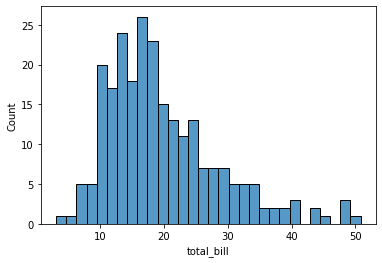

In [360]:
sns.histplot(tips['total_bill'],bins=30)

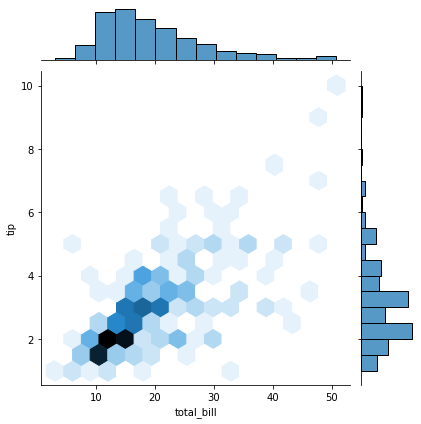

In [361]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

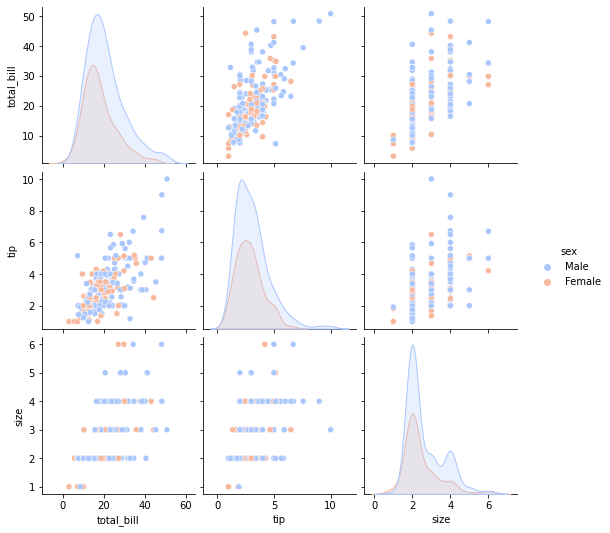

In [365]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

In [85]:
tips[tips['tip']>9]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

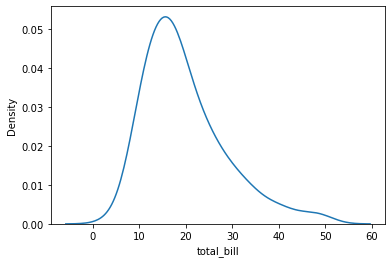

In [92]:
sns.kdeplot(tips['total_bill'])

In [367]:
import numpy as np

<AxesSubplot:xlabel='CityCity', ylabel='FundFund'>

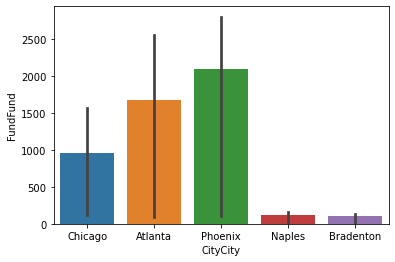

In [370]:
sns.barplot(x='CityCity',y='FundFund',data=df_merge,estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

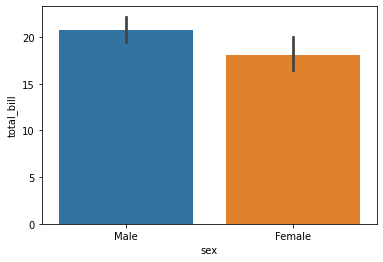

In [371]:
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='CityCity', ylabel='count'>

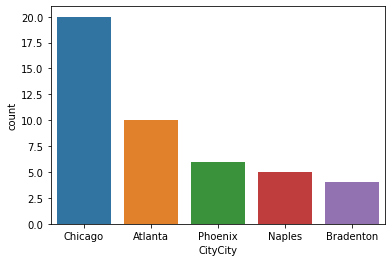

In [375]:
sns.countplot(x='CityCity',data=df_merge)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

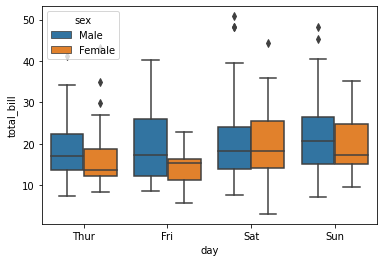

In [380]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

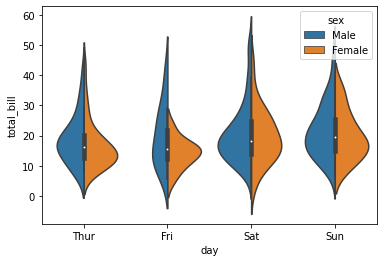

In [382]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

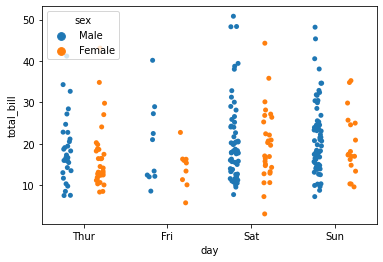

In [387]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

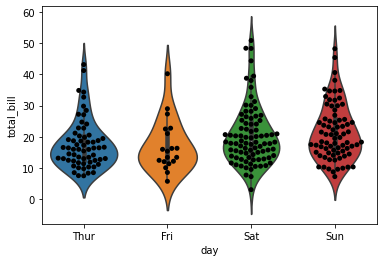

In [390]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')